In [1]:
from fastai.vision import *

In [2]:
directory = 'dataset'
path = Path(directory)

In [3]:
bs = 32
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
        ds_tfms=get_transforms(), size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

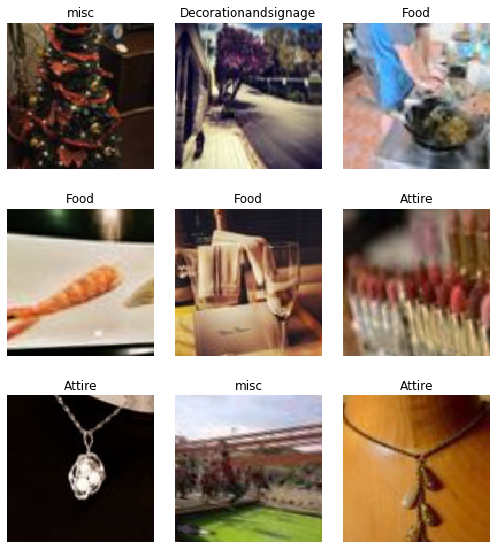

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=FBeta(average='weighted', beta=1))

In [7]:
# Freezed
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f_beta,time
0,1.411701,0.768335,0.737195,01:22
1,1.084551,0.658350,0.766224,01:15
2,0.867488,0.556918,0.794991,01:14
3,0.704986,0.525627,0.816810,01:14
4,0.628057,0.504697,0.812570,01:16
5,0.579732,0.463422,0.830007,01:15
6,0.539660,0.450107,0.848394,01:15
7,0.488775,0.433735,0.844307,01:15
8,0.465988,0.443469,0.839820,01:15
9,0.423054,0.434937,0.837161,01:15


In [8]:
# Unfreezing sucks
# learn.recorder.plot(suggestion = True)

In [9]:
learn.save('resnet-stage-1')

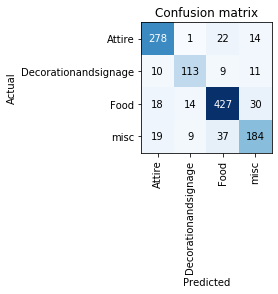

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export()

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.fit_one_cycle(10)     # training stopped in middle

epoch,train_loss,valid_loss,f_beta,time
0,1.293431,0.873480,0.731959,01:21
1,1.051837,0.703301,0.778239,01:14
2,0.781899,0.540967,0.802225,01:11
3,0.645351,0.521695,0.805424,01:11
4,0.567865,0.456253,0.829565,01:08
5,0.511286,0.459322,0.832891,01:09
6,0.453755,0.431751,0.841528,01:09
7,0.430829,0.431428,0.839924,01:09
8,0.372838,0.419510,0.843909,01:09


KeyboardInterrupt: 

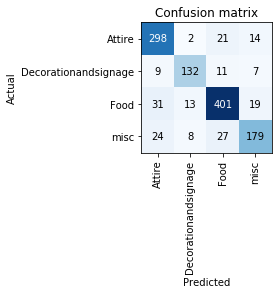

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
learn.save('resnet50-stage-2')

In [11]:
learn.export()

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.unfreeze()

In [8]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,f_beta,time
0,1.164340,0.968620,0.759156,01:19
1,0.827424,0.753413,0.782452,01:14
2,0.598566,0.656338,0.779980,01:14
3,0.496615,0.536682,0.794863,01:16
4,0.380316,0.577119,0.814132,01:14
5,0.275539,0.611529,0.811442,01:15
6,0.172684,0.595644,0.825436,01:14
7,0.113852,0.596946,0.829092,01:15


In [6]:
learn = cnn_learner(data, models.resnet50, metrics=FBeta(average='weighted', beta=1))
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-04
Min loss divided by 10: 1.74E-04


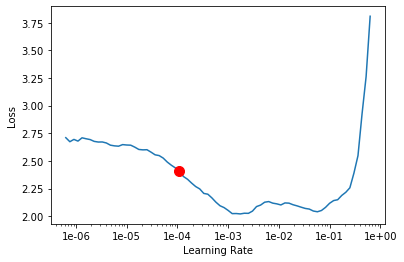

In [7]:
learn.recorder.plot(suggestion=True)

In [8]:
learn.fit_one_cycle(8, max_lr=slice(1.1e-4,1.74e-4))

epoch,train_loss,valid_loss,f_beta,time
0,1.678994,0.844441,0.728397,01:16
1,1.060215,0.803421,0.768323,01:14
2,0.777498,0.670889,0.787647,01:14
3,0.555975,0.680931,0.801018,01:14
4,0.411961,0.703794,0.806351,01:14
5,0.294315,0.668997,0.804151,01:14
6,0.213511,0.674803,0.819222,01:16
7,0.184448,0.678707,0.815917,01:17


In [9]:
learn.save('resnet50-unfreezed-stage-1')    # best

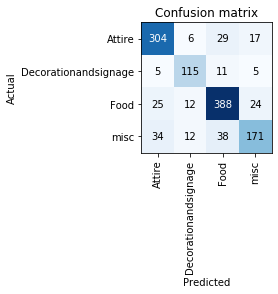

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn.export()

In [6]:
# With size = 80, unfreezed, and not lr
learn = cnn_learner(data, models.resnet50, metrics=FBeta(average='weighted', beta=1))
learn.unfreeze()
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f_beta,time
0,1.187199,0.733941,0.783750,01:21
1,0.859723,0.823907,0.776612,01:15
2,0.634119,0.556915,0.801936,01:14
3,0.525048,0.762769,0.775973,01:14
4,0.453329,0.643201,0.789798,01:16
5,0.379304,0.676572,0.786921,01:15
6,0.279802,0.655550,0.816509,01:13
7,0.195275,0.643692,0.822640,01:15
8,0.132274,0.661802,0.822753,01:15
9,0.088909,0.658706,0.828338,01:16


In [7]:
learn.save('resnet50-unfreezed-stage-2')

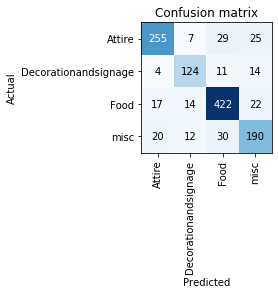

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
learn.export()

In [6]:
# With size 80 and freezed
learn = cnn_learner(data, models.alexnet, metrics=FBeta(average='weighted', beta=1))
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,f_beta,time
0,2.111055,1.399422,0.453430,00:49
1,1.905171,1.193402,0.548964,00:46
2,1.774042,1.134141,0.577548,00:46
3,1.667138,1.077538,0.611848,00:46
4,1.587765,1.030951,0.625855,00:47
5,1.514402,0.982973,0.640439,00:47
6,1.455839,0.959230,0.642757,00:46
7,1.385476,0.935911,0.649291,00:47
8,1.320289,0.910761,0.653508,00:43
9,1.263563,0.878190,0.656146,00:43


KeyboardInterrupt: 

In [12]:
# Resnet50, bs = 16
# size 128 and freezed
learn = cnn_learner(data, models.resnet50, metrics=FBeta(average='weighted', beta=1))
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,f_beta,time
0,1.288940,0.851443,0.716316,01:17
1,0.955698,0.757125,0.724316,01:18
2,0.795348,0.662603,0.745683,01:21
3,0.771793,0.597204,0.790495,01:29
4,0.669514,0.568437,0.776729,01:22
5,0.645278,0.513471,0.799493,01:15
6,0.625962,0.497771,0.812603,01:14
7,0.537096,0.473301,0.822317,01:15
8,0.459451,0.476281,0.824740,01:15
9,0.467482,0.462371,0.826143,01:15


In [13]:
learn.save('resnet50-stage-4')

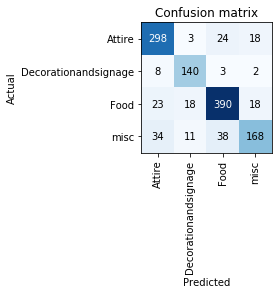

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.export()

In [6]:
# Resnet152
# size = 128    bs = 32     # best
learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f_beta,time
0,1.115038,0.842498,0.745503,03:07
1,0.894973,0.611920,0.783303,02:55
2,0.669747,0.500372,0.812133,03:07
3,0.582928,0.481896,0.818642,02:52
4,0.515679,0.493332,0.824153,03:03
5,0.474272,0.458157,0.837183,02:49
6,0.413641,0.443863,0.844662,01:51
7,0.323806,0.453220,0.846666,01:51
8,0.291997,0.435783,0.850175,01:51
9,0.280961,0.427990,0.845372,01:52


In [8]:
learn.save('resnet152-stage-1')

In [9]:
learn.export()

In [6]:
#v2, not better
learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,f_beta,time
0,1.160687,0.696850,0.774837,01:53
1,1.049241,0.674058,0.784557,01:49
2,0.828692,0.572238,0.789538,01:49
3,0.655493,0.497618,0.818529,01:49
4,0.578164,0.498461,0.825988,01:49
5,0.548262,0.455063,0.841413,01:49
6,0.517301,0.478070,0.828945,01:49
7,0.476191,0.440446,0.846516,01:49
8,0.451149,0.428488,0.853433,01:49
9,0.391679,0.433076,0.836747,01:50


In [7]:
learn.save('resnet152-stage-3')
learn.export()

In [6]:
# Resnet152 unfreezed
# size = 128, bs = 32
learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06
Min loss divided by 10: 1.74E-04


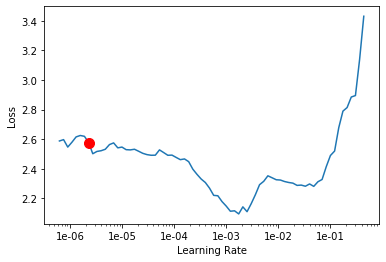

In [7]:
learn.recorder.plot(suggestion=True)

In [9]:
m = learn.recorder.min_grad_lr
print(m)

2.2908676527677735e-06


In [10]:
learn.fit_one_cycle(20, max_lr=slice(m,3e-6))

epoch,train_loss,valid_loss,f_beta,time
0,2.572768,1.877903,0.242653,02:47
1,2.401868,1.692743,0.298159,02:51
2,2.135006,1.413027,0.411949,02:45
3,1.782883,1.168169,0.543675,02:45
4,1.512771,0.962887,0.645197,02:46
5,1.351784,0.871046,0.690227,02:44
6,1.262339,0.798698,0.720794,02:44
7,1.179739,0.757429,0.738797,02:44
8,1.058639,0.771378,0.734246,02:44
9,1.063373,0.728983,0.762993,02:44


In [11]:
learn.save('resnet152-unfreezed-stage-1')
learn.export()

In [10]:
m

6.309573444801933e-07

In [6]:
# Densenet201
# size = 128, bs = 32
learn = cnn_learner(data, models.densenet201, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,f_beta,time
0,1.199222,0.759163,0.737702,03:08
1,0.962011,0.710470,0.773563,02:13
2,0.799684,0.708541,0.748377,02:02
3,0.652760,0.549195,0.799993,02:02
4,0.525464,0.543714,0.801237,02:01
5,0.533382,0.528206,0.811066,02:02
6,0.494676,0.495870,0.814674,02:02
7,0.426287,0.494927,0.831468,02:07
8,0.382697,0.525135,0.823746,01:59
9,0.320078,0.557822,0.823675,02:08


KeyboardInterrupt: 

In [8]:
learn.save('densenet201-stage-1')

In [9]:
learn.export()

In [6]:
# Densenet201 unfreezed
# size = 128, bs = 32
learn = cnn_learner(data, models.densenet201, metrics=FBeta(average='weighted', beta=1))
learn.unfreeze()
learn.fit_one_cycle(20)
### Sucks!!!!!

epoch,train_loss,valid_loss,f_beta,time
0,1.156544,0.705033,0.768324,02:53
1,0.911534,0.728868,0.797463,02:26
2,0.751324,0.686526,0.786791,02:29
3,0.571417,0.647690,0.796251,02:29
4,0.573716,0.675174,0.761251,02:28


KeyboardInterrupt: 

In [ ]:
learn.save('densenet201-unfreezed-stage-1')
learn.export()